# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: <br>
Roll Number:

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [2]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [3]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [4]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


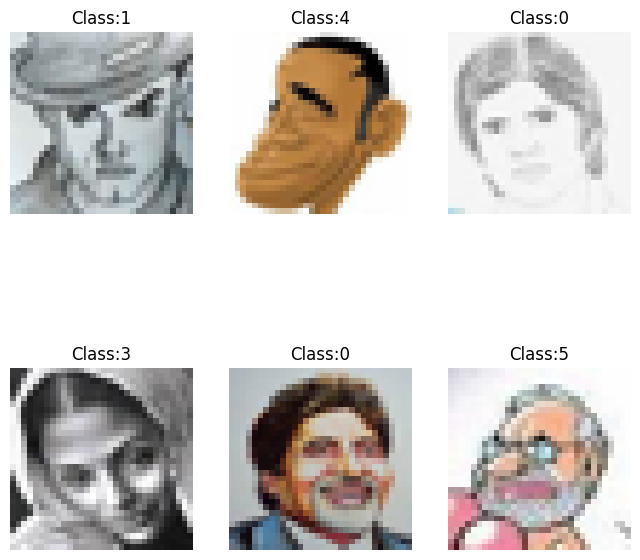

In [5]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)


## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [6]:
def compute_eig(X):
    # print(X.shape)
    x=X.reshape((X.shape[0],-1))
    xbar=np.mean(x,axis=0)
    cov=np.cov((x-xbar).T)
    # print(cov[0][0])
    eig_vals, eig_vecs = np.linalg.eig(cov)
    idx = eig_vals.argsort()[::-1]   
    eigenValues = eig_vals[idx]
    eigenVectors = eig_vecs[:,idx]
    return (eigenValues,eigenVectors,xbar)

In [7]:

eigenValues,eigenVectors,xbar=compute_eig(X)
print(X.shape)

0.0941683573158053
(672, 32, 32, 3)


#### Compute eigen values and plot eigen value spectrum

/home/shiridi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


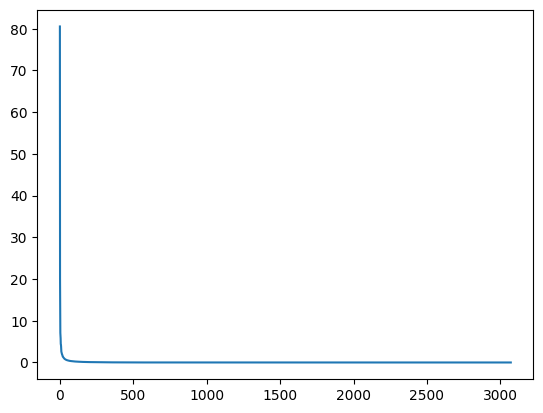

In [8]:
plt.plot(eigenValues)
plt.show()

#### Plot the percentage of variances vs the number of principal components

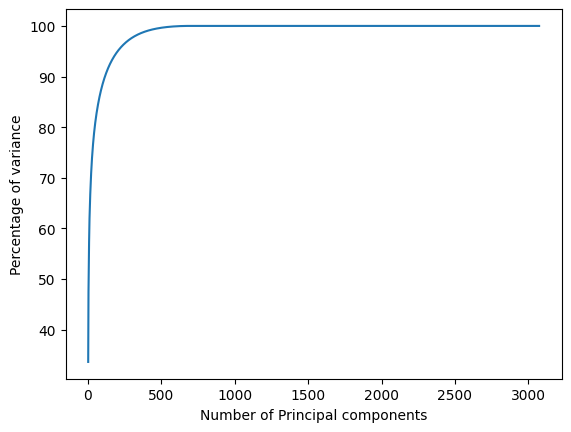

In [9]:
num_eig_values=[]
va=[]
req_vals=-1
for i in range(1,len(eigenValues)+1):
    num_eig=eigenValues[:i]
    num_eig_values.append(i+1)
    x=sum(num_eig)/sum(eigenValues)
    va.append(x*100)
    if(x*100>=90 and req_vals==-1):
        req_vals=i
    plt.xlabel("Number of Principal components")
    plt.ylabel("Percentage of variance")

plt.plot(num_eig_values,va)


#### Visualize eigen faces(eigen vectors)

(3072, 3072)
(3072, 32, 32, 3)


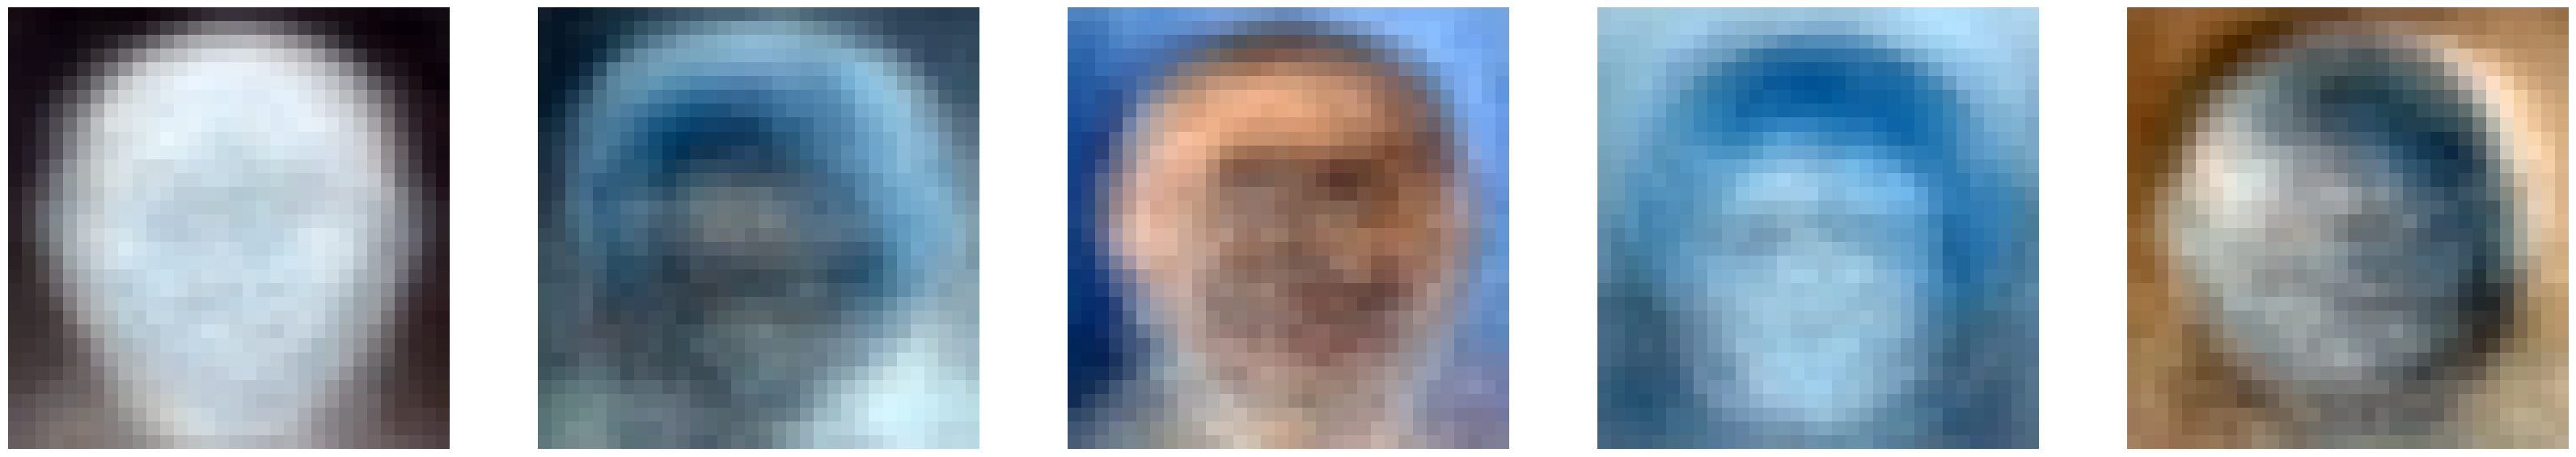

In [10]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)"""

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    print(pl.shape)
    plt.figure(figsize=(100,100))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()
eig_vector=np.zeros(len(eigenVectors[0]),dtype=float)
eig_vectors=[]
for i in range(len(eigenVectors)):
    eig_vectors.append(eig_vector)
eig_vectors=np.array(eig_vectors)
print(eig_vectors.shape)

indices = [randrange(12)+1 for i in range(5)]
# plot(eig_vecs_sorted,H,W,C, indices)
# for i in range(len(eigenVectors)):
#     eig_vectors[i]=np.array(list(map(lambda x: float(x.real),eigenVectors[i])))
eig_vectors=np.real(eigenVectors)
# eigenVectors.dtype=float
# print()
plot(eig_vectors,H,W,C, indices)

#### Reconstruction 

In [15]:
# reconstruction
def compute_recc(X,vecs):
    x=X.reshape(X.shape[0],-1)
    x=x-xbar
    # print(eigenVectors.shape)
    x=np.dot(x,eigenVectors)
    x=np.dot(x,eigenVectors.T)
    x=x+xbar
    x=x.reshape(X.shape)
    return x

    
eigenVectors=eig_vectors[:,:100]
x=compute_recc(X,eigenVectors)
def disp_img(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()
print(X.shape)
ind = np.random.randint(0,y.shape[0],6)

(672, 32, 32, 3)


#### Plot data in 2D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


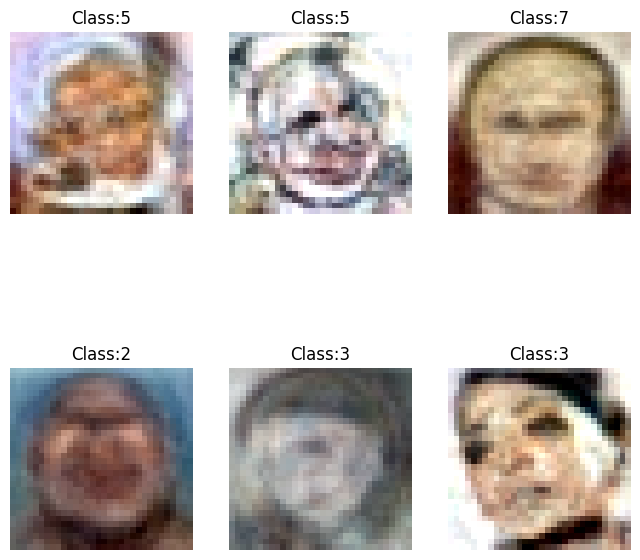

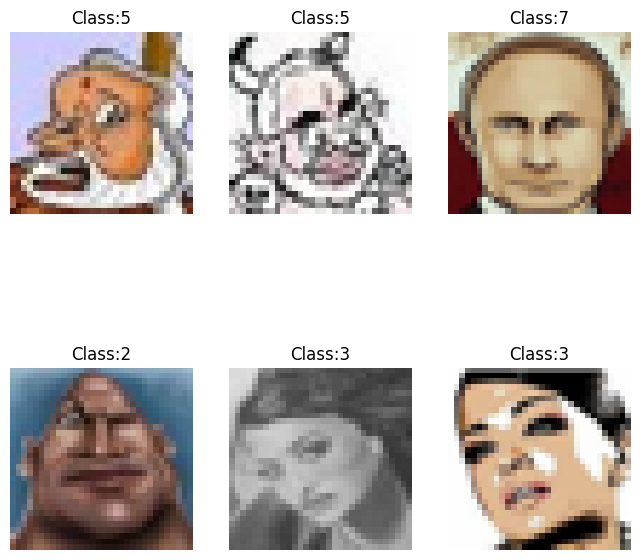

In [16]:
# plot data in 2D
display_images(x[ind,...],y[ind], row=2,col=3)
display_images(X[ind,...],y[ind], row=2,col=3)

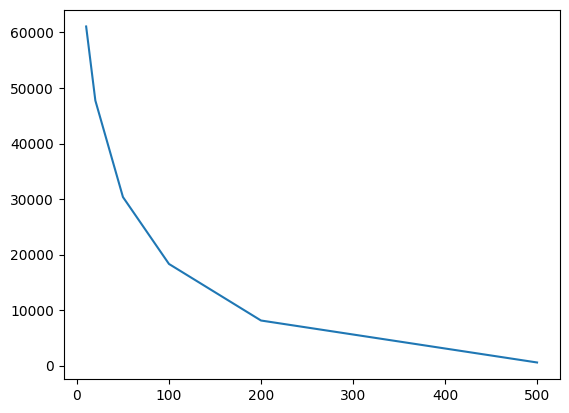

In [17]:
comp=[10,20,50,100,200,500]
errs=[]

for i in range(len(comp)):
    eigenVectors=eig_vectors[:,:comp[i]]
    x=compute_recc(X,eigenVectors)
    recerr=abs(x-X)*abs(x-X)
    err=np.sum(recerr)
    errs.append(err)
plt.plot(comp,errs)

In [18]:
first=eig_vectors[:,0]
second=eig_vectors[:,1]
errs1=[]
errs2=[]

fr=compute_recc(X,first)
recerr=abs(fr-X)*abs(fr-X)
# err=np.sum(recerr)
recerr=recerr.shape(X.shape[0],-1)
err=list(map(lambda x: sum(x),recerr))
print(err.shape)

errs1.append(err)

sr=compute_recc(X,second)
recerr=abs(sr-X)*abs(sr-X)
err=np.sum(recerr)
errs2.append(err)



(672, 32, 32, 3)


## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [108]:
# Load data again
def compute_var(eig_vals,i):
    return (sum(eig_vals[:i])/sum(eig_vals))*100
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

Dominant eigen faces in Class: 0
(3072, 32, 32, 3)


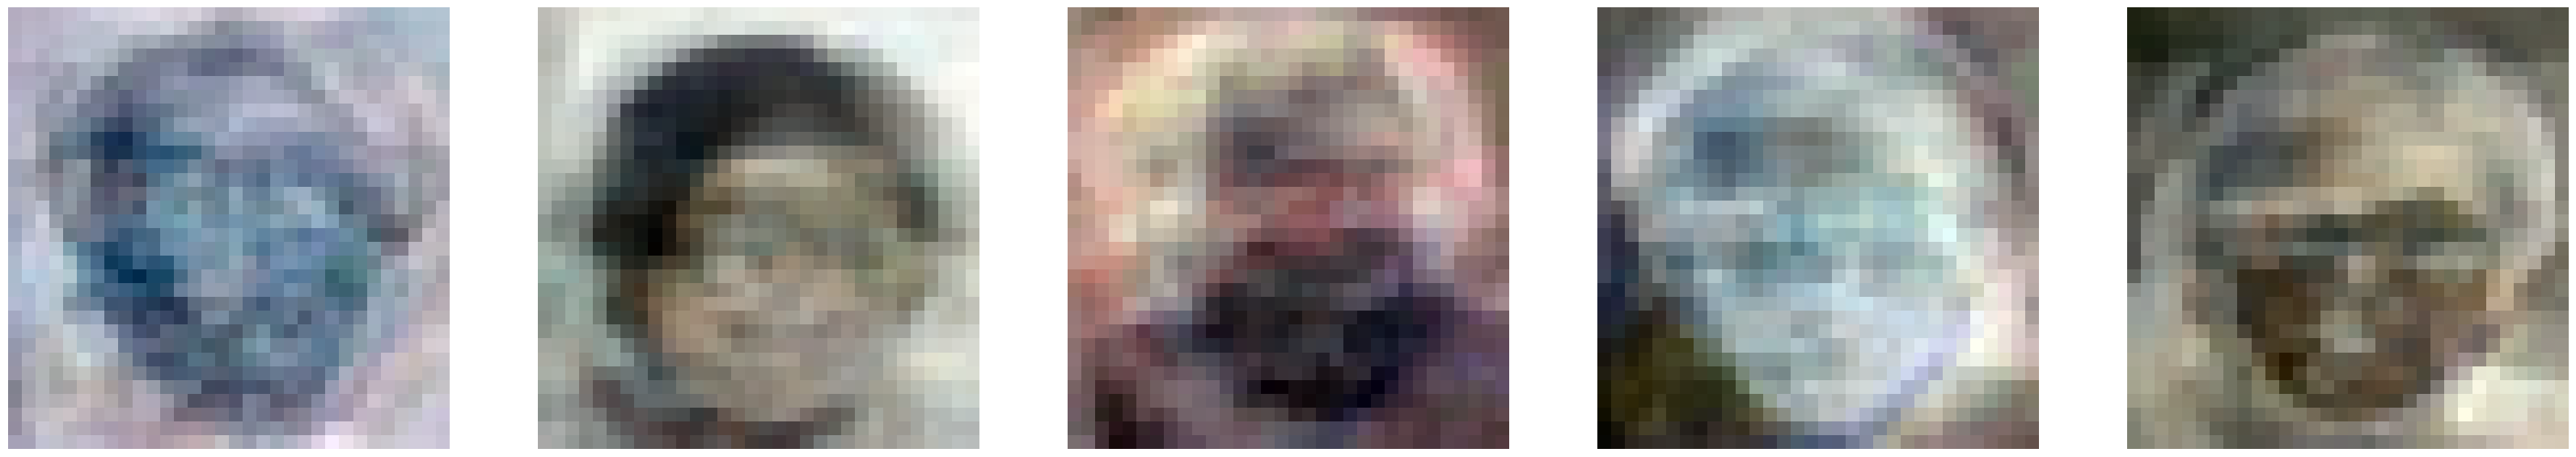


Dominant eigen faces in Class: 1
(3072, 32, 32, 3)


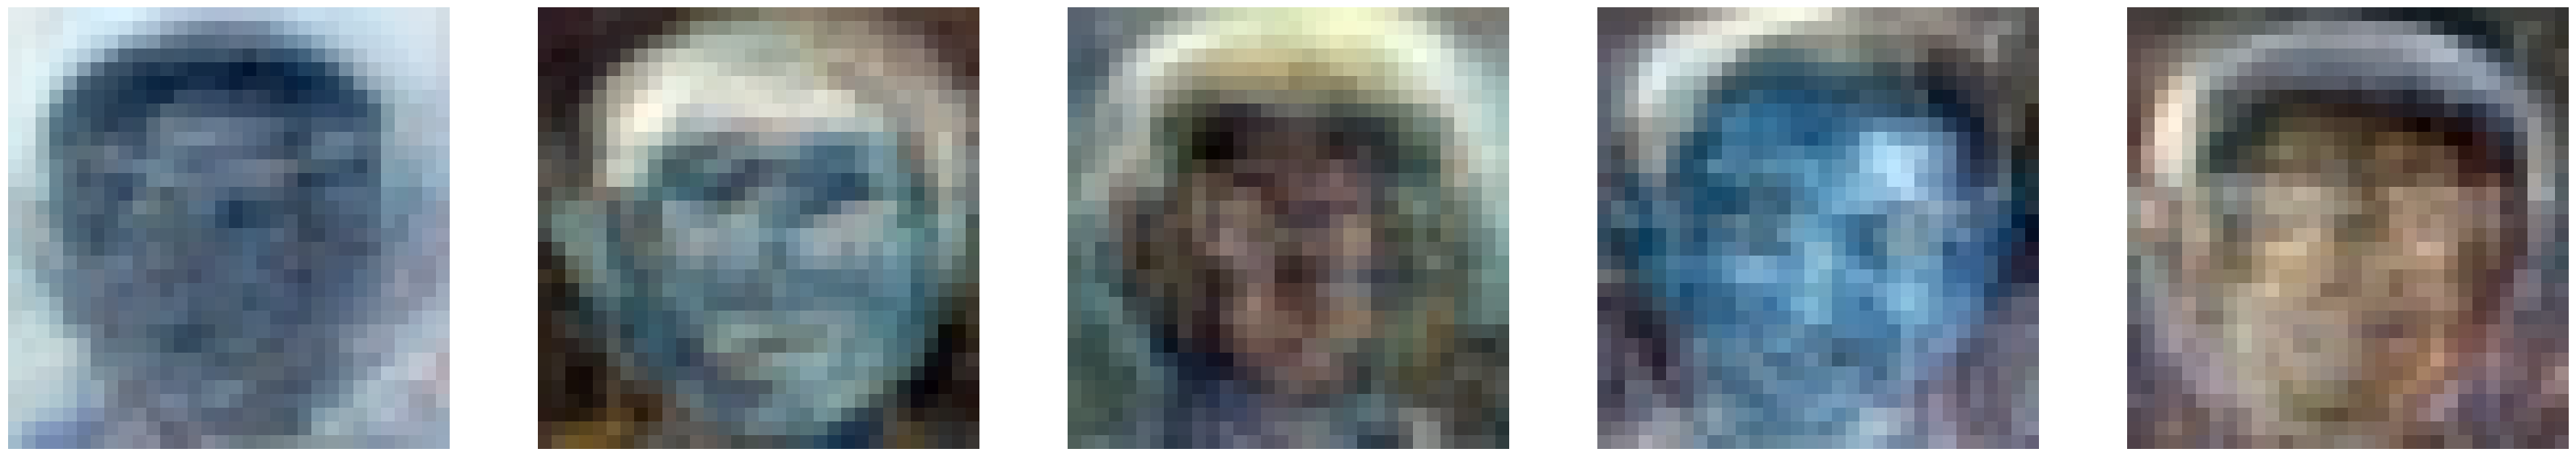


Dominant eigen faces in Class: 2
(3072, 32, 32, 3)


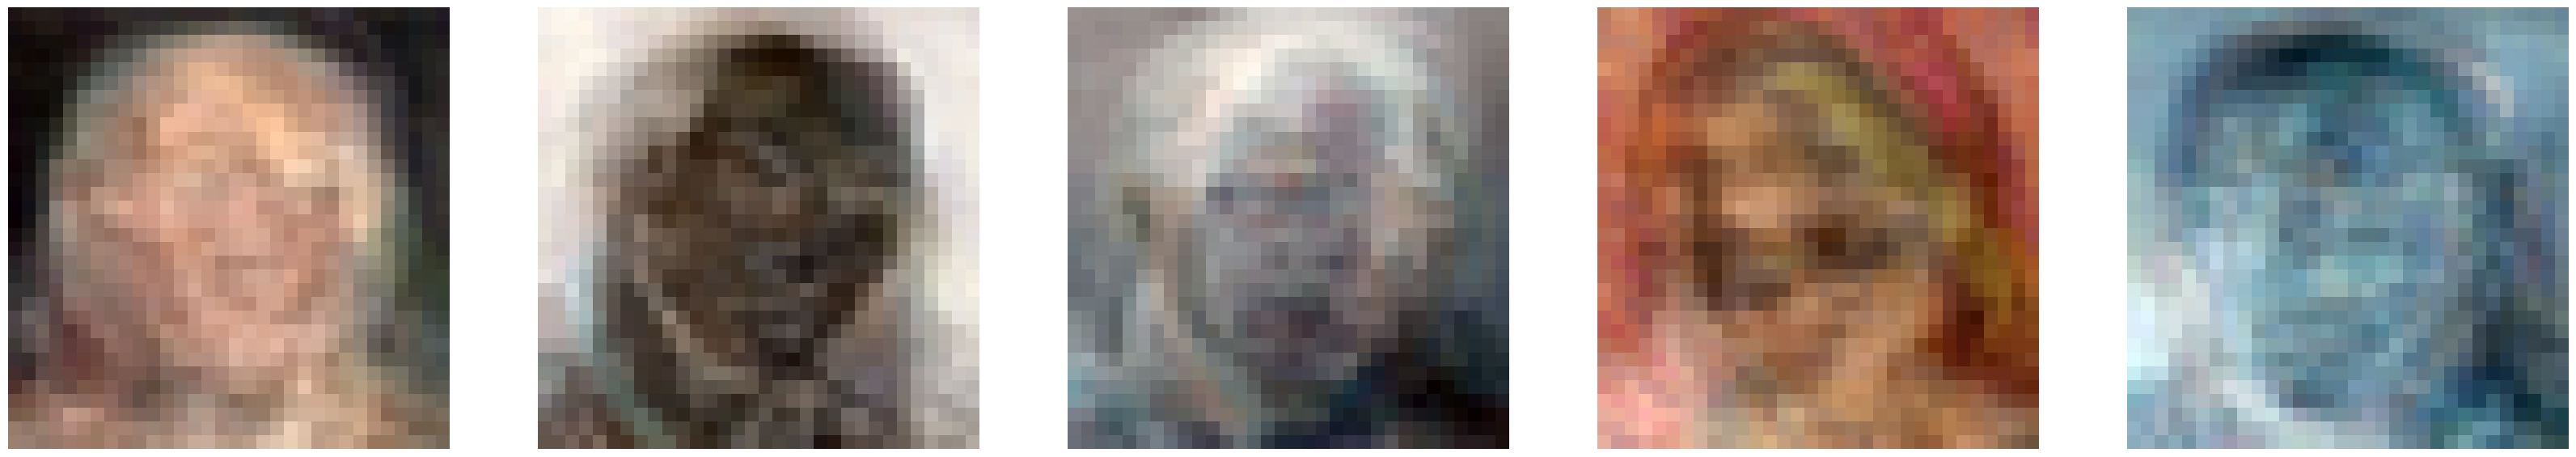


Dominant eigen faces in Class: 3
(3072, 32, 32, 3)


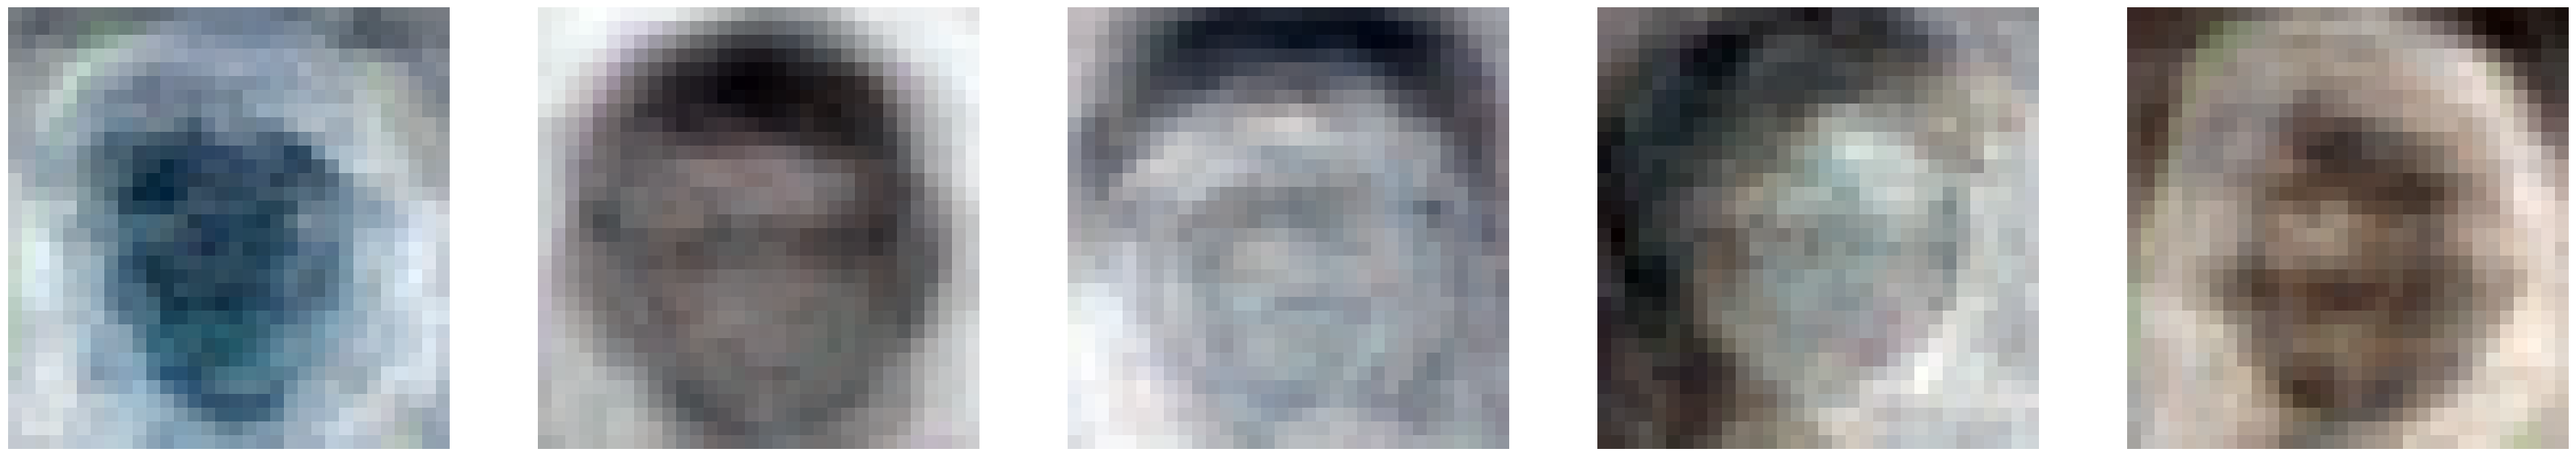


Dominant eigen faces in Class: 4
(3072, 32, 32, 3)


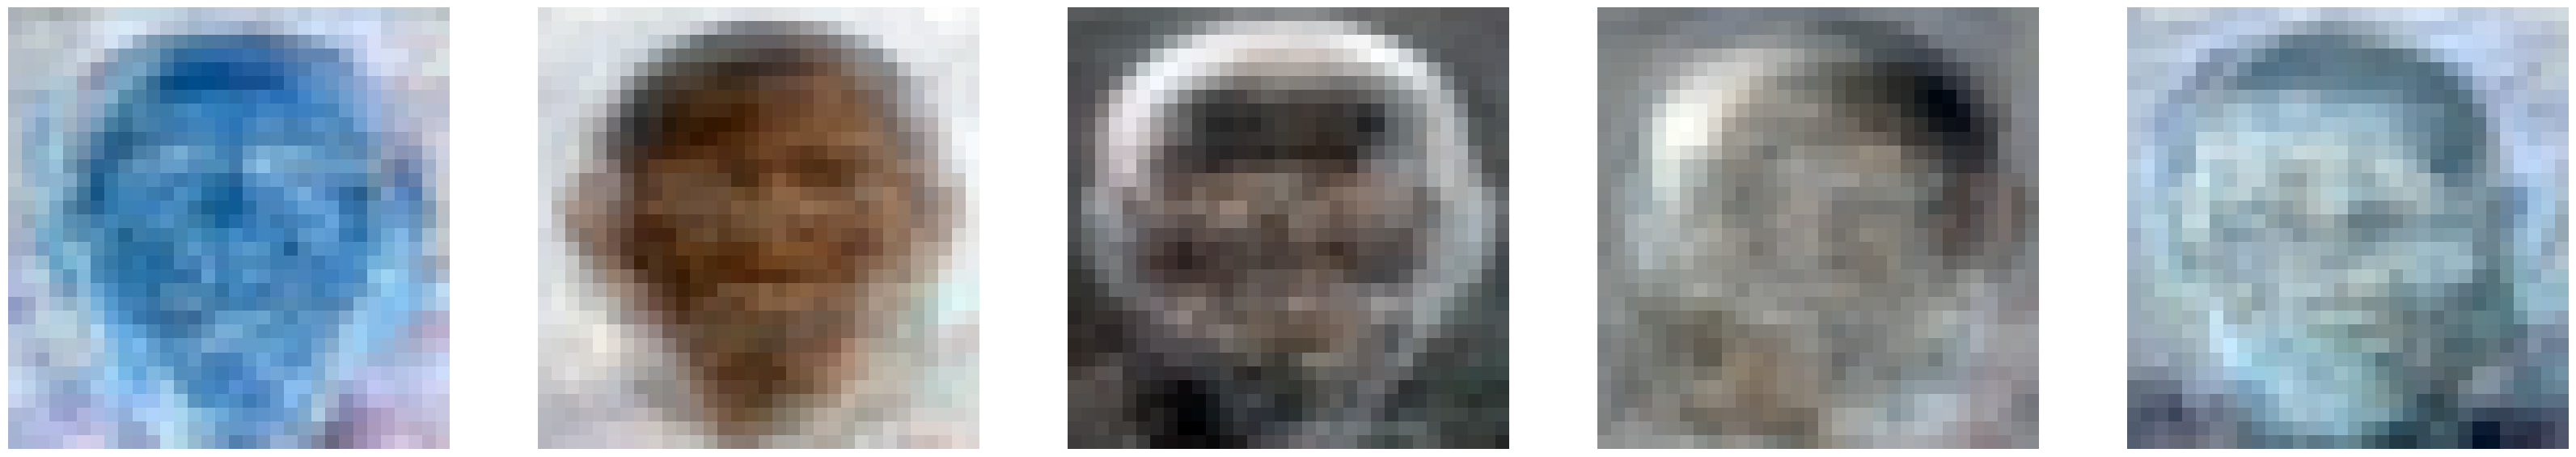


Dominant eigen faces in Class: 5
(3072, 32, 32, 3)


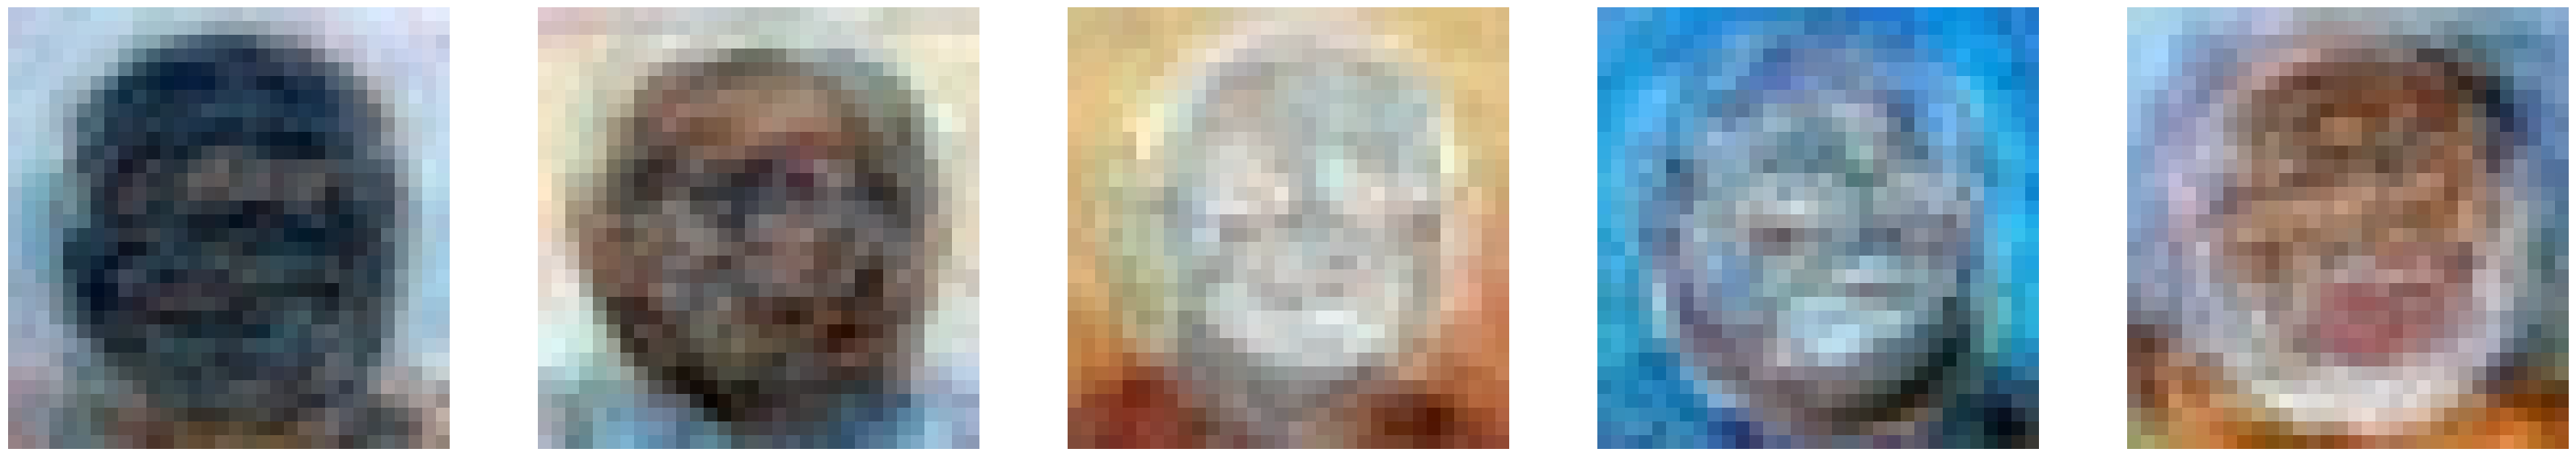


Dominant eigen faces in Class: 6
(3072, 32, 32, 3)


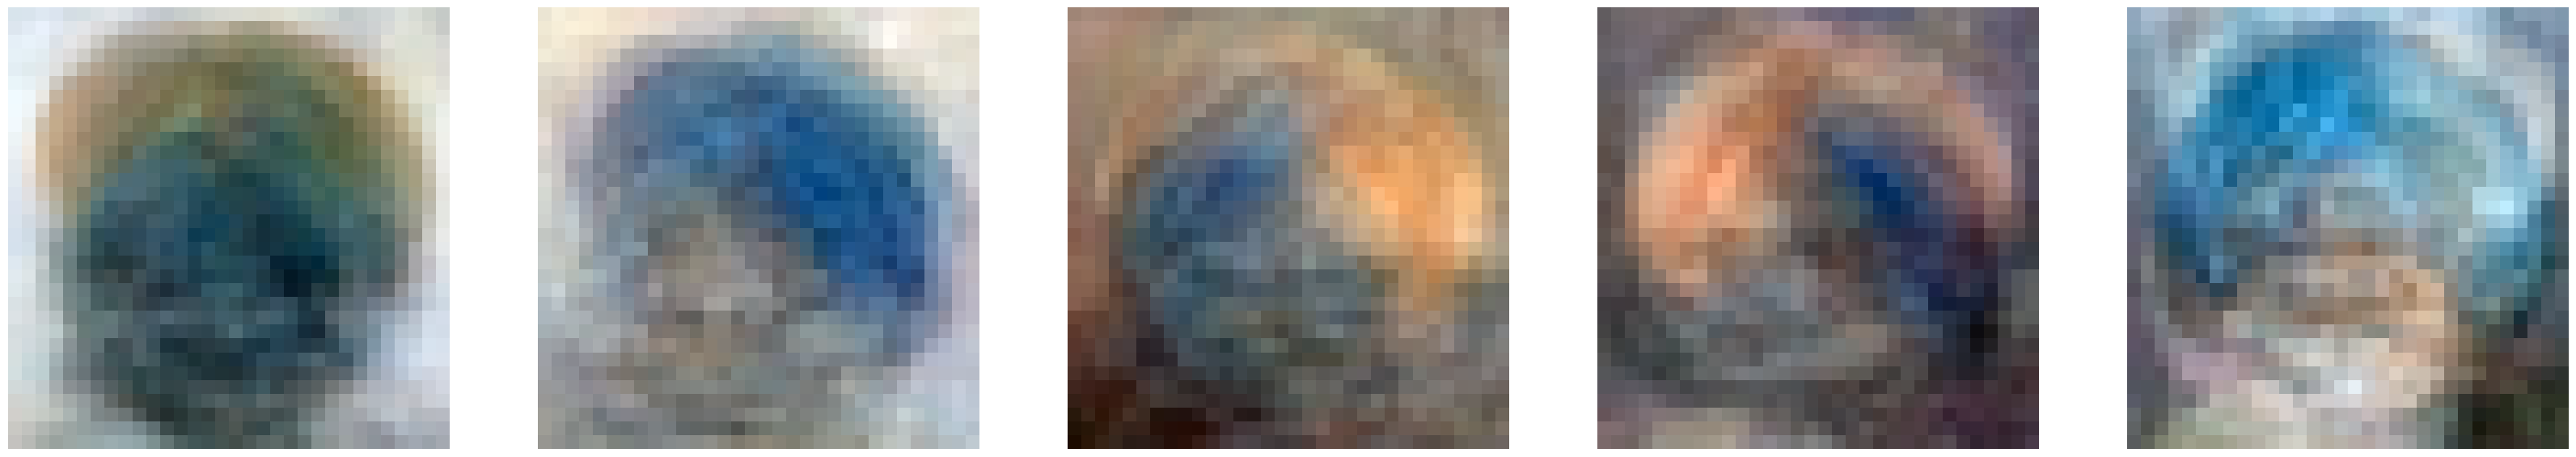


Dominant eigen faces in Class: 7
(3072, 32, 32, 3)


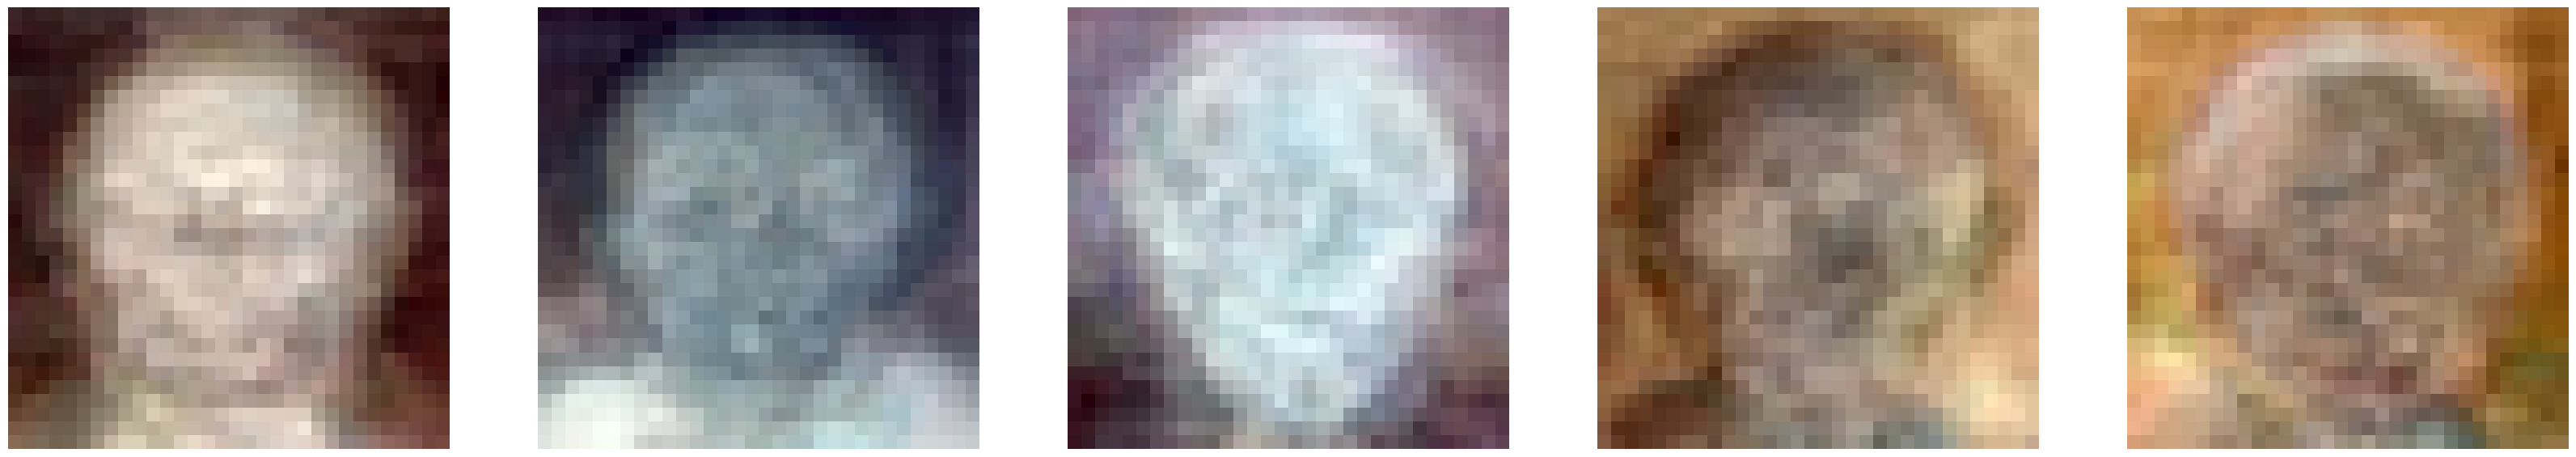

In [109]:
all_classes=np.unique(y)
num=[]
for i in range(len(all_classes)):
    target_label=all_classes[i]
    ind=list(map(lambda x:y[x]==target_label,range(len(y))))
    newx=X[ind,:,:,]
    newy=y[ind]
    eig_vals,eig_vecs,_=compute_eig(newx)
    eig_vecs=np.real(eig_vecs)
    for j in range(len(eig_vals)):
        if(compute_var(eig_vals,j)>=90):
            num.append(j)
            break
    print("Dominant eigen faces in Class: {}".format(all_classes[i]))
    plot(eig_vecs,H,W,C, range(5))
    print()

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [113]:
print("Number of principal components required for 90% reconstruction of the:")
print("Entire Dataset","=",req_vals)
def getkey(val):
    for i in cfw_dict:
        if(cfw_dict[i]==val):
            return i
for i in range(len(num)):
    print(getkey(all_classes[i]),"=",num[i])


Number of principal components required for 90% reconstruction of the:
Entire Dataset = 115
Amitabhbachan = 21
AamirKhan = 24
DwayneJohnson = 28
AishwaryaRai = 36
BarackObama = 43
NarendraModi = 57
ManmohanSingh = 50
VladimirPutin = 44


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

In [16]:
""" The total number of components are same for the entire dataset and also same for each class(number of components = number of features for
 each data point in the class) since the number of features are same across all of them . 
 But the number of principal components required for explaining 90% variance is different across different classe and dataset, since the 
 variance across intraclass and interclass changes and hence their directions of maximum variance will also change , due to which there would be different
 number of components required for attaining 90% variance in each class and entire dataset
"""

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [115]:
# datapoints
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,label,test_size=0.2,random_state=0)
scores=[]
for i in range(1,201):
    model=LinearRegression()
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_train)
    model.fit(principalComponents,y_train)
    xtest=pca.transform(X_test)
    scores.append([i,model.score(xtest,y_test)])


Text(0, 0.5, 'Regression Score')

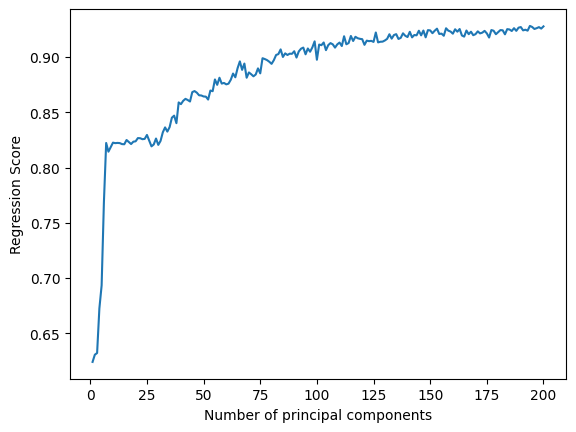

In [157]:
# analysis / plot (split the cells if required)
"""Analysis : We can infer from the plot that as we increase the number of components the regression increases initially much but later adding
more number of components is not showing much difference(from 100 number of components approx). Also another key takeaway here is ,as we saw that number of
components which could explain 90% variance in the data is 112 from the earlier section , we can see in the below plot that it follows the same trend i.e, after
increasing the number of components above 112 the regression core doesnt increase much.Also though there are some dips in regression scores 
after using more number of components , in general we can see the trend as the number of components increase 
"""
scores=np.array(scores)
plt.plot(range(1,201),scores[:,1])
plt.xlabel("Number of principal components")
plt.ylabel("Regression Score")